In [27]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [28]:
customer_data = pd.read_csv('Mall_Customers.csv')

In [29]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [32]:
X = customer_data.drop(columns=['CustomerID','Genre','Age'], axis=1).values

In [33]:
# Visualize data Points

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


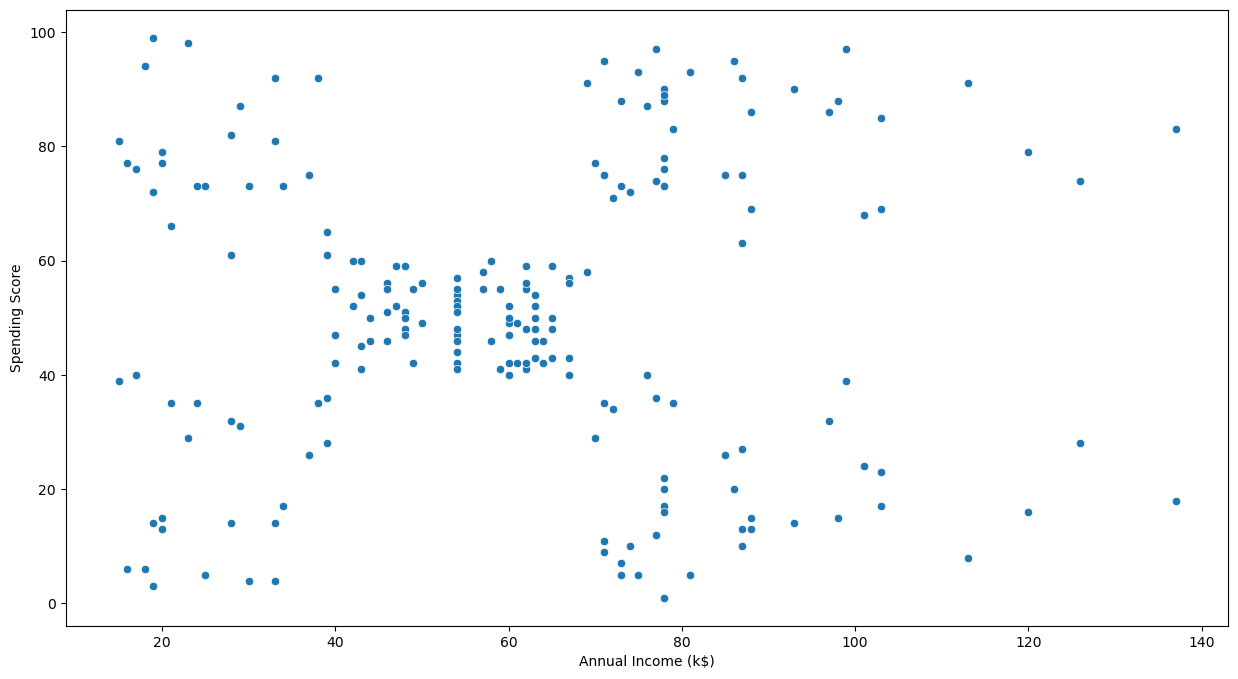

In [34]:
plt.figure(figsize=(15,8))
sns.scatterplot(X[:,0],X[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [35]:
# Finding the k value using Elbow Method

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


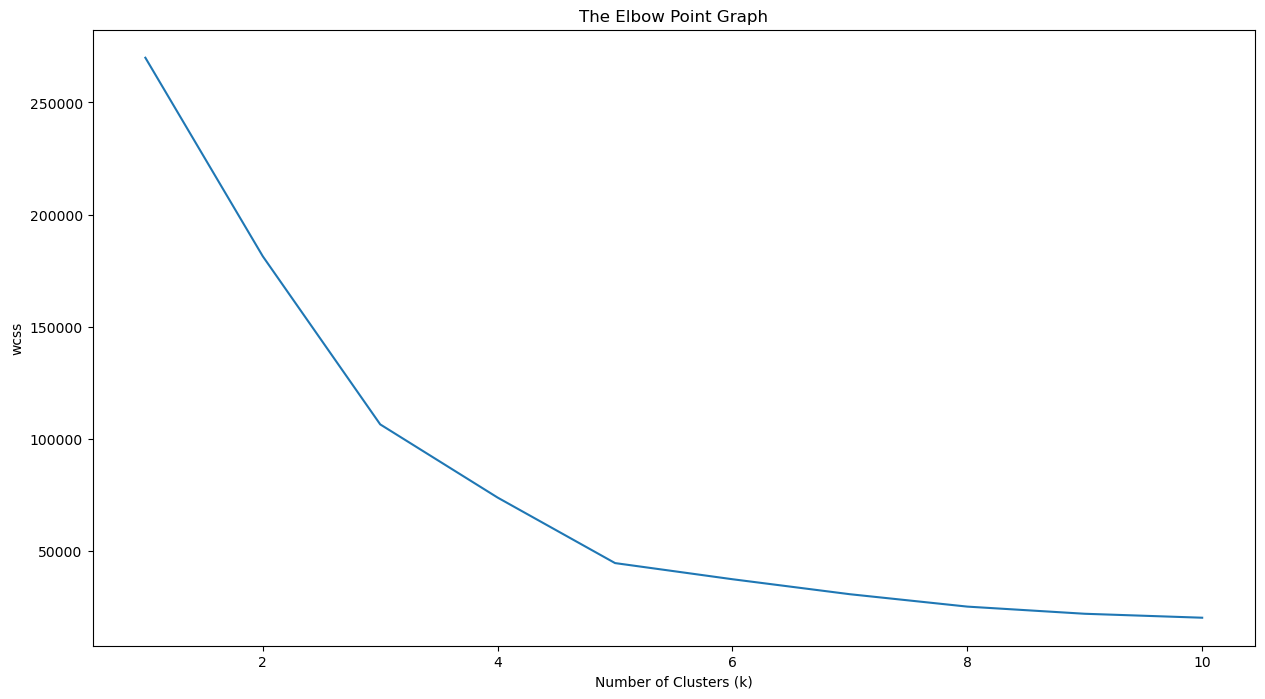

In [36]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('wcss')
plt.show()

In [37]:
# Training the K-means algorithm on the training dataset

In [38]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

In [39]:
# Centrod Points

In [40]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

In [41]:
# Now Visualizing the clusters which are formed

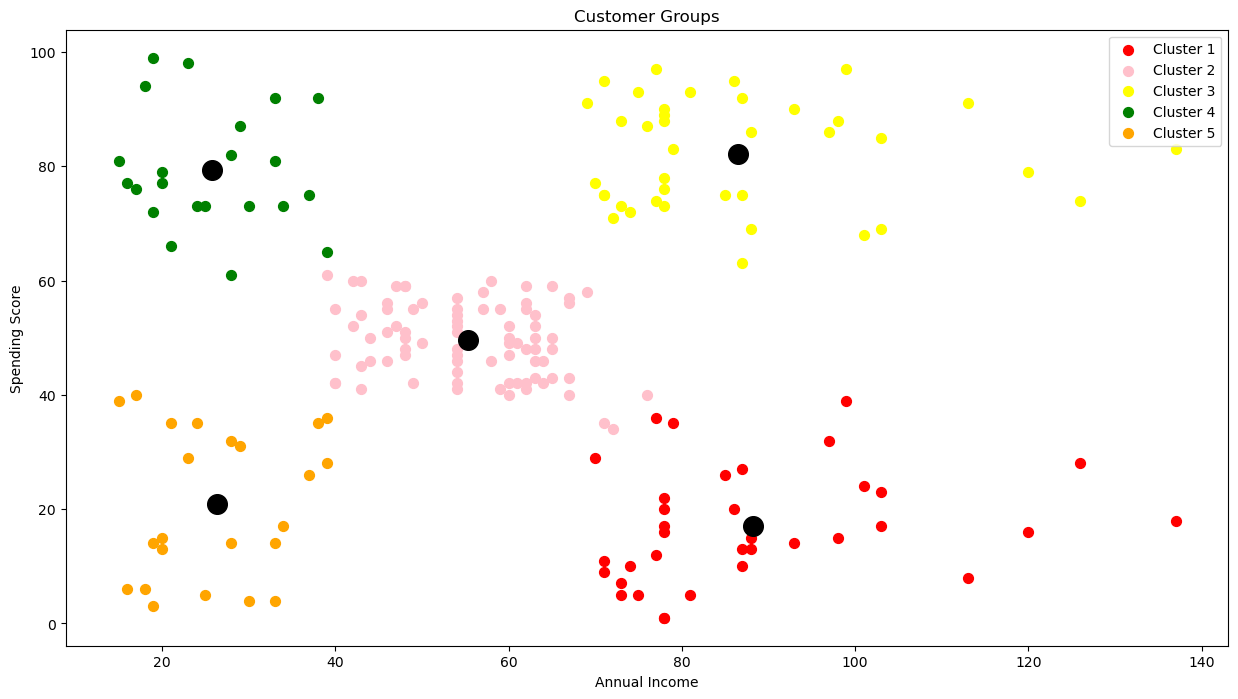

In [42]:
plt.figure(figsize=(15,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='red',label="Cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='pink',label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='yellow',label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='green',label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='orange',label="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black')
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

In [ ]:
# Now we can see above the 5 Clusters are formed...
#Thank You....